   **Author:** Andre Veit

   **LinkedIn:** https://www.linkedin.com/in/andreveit/

   **E-mail:** andrev.veit@gmail.com

# CONSUMER REVIEWS OF AMAZON PRODUCTS


# Sentiment Analysis

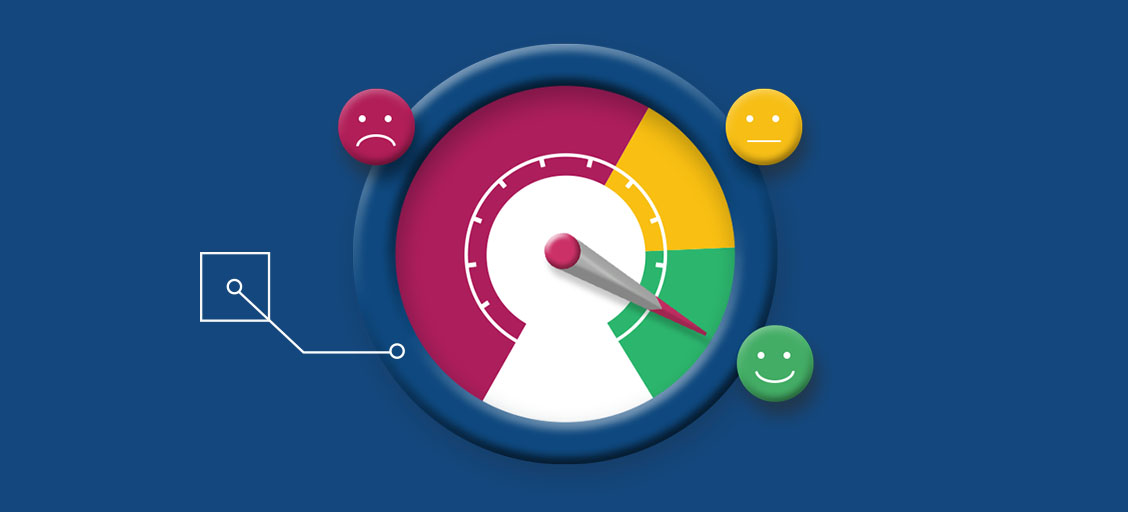

## About this notebook:

&emsp; According to Badree Shshetty on his blog post published in Towards Data Science, "NLP is a field in machine learning with the ability of a computer to understand, analyze, manipulate, and potentially generate human language." It has been applied in several fields with many different objectives such as language translation, text summarization, spam filter, sentiment analysis and many others.

&emsp; The objective of this notebook is, unsing machine learning algorithms, build a text classifier to identify "Happy" documents, "Angry" documents or just "Neutral" ones. For training, it was chosen Amazon product reviews, that conveniently were already labeled.

&emsp; This study is divided in two parts, the first part (this notebook) consists in building a voting classifier through some classic machine learning algorithms. In the second part, a BERT model will be fine tunned using this same dataset.


### Overview:

**PART I:**


1) Data Cleaning

3) Data Exploration

4) Data Preprocessing and Preparation
> 4.1) Data Preprocessing<br>
> 4.2) Most Frequent Words<br>
> 4.3) Data Preparation<br>
> >4.3.1) Helper functions<br>
> >4.3.2) Balanced vs Imbalanced Data <br>
> >4.3.3) TfidfVectorizer   vs   CountVectorizer <br>
> >4.3.3) Data Preparation - Final State <br>

5) Classification Models
> 5.1) Base Models<br>
> 5.2) Grid Search and Cross Validation<br>
> >5.2.1) Support Vector Machines <br>
> >5.2.2) Logistic Regression <br>
> >5.2.3) Naive Bayes <br>
> >5.2.4) Random Forest <br>
> >5.2.5) Gradient Boosting <br>
> >5.2.6) Voting Classifier <br>

6) Wrapping up

<br>
<br>

**PART II:**

(Under construction)

## Data Set

&emsp;The dataset analyzed was provided by Datafiniti on Kaggle website.

&emsp;https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products?select=1429_1.csv

&emsp;Below, Datafiniti's data description:

### About This Data

&emsp;This is a list of over 34,000 consumer reviews for Amazon products like the Kindle, Fire TV Stick, and more provided by Datafiniti's Product Database. The dataset includes basic product information, rating, review text, and more for each product.

&emsp;Note that this is a sample of a large dataset. The full dataset is available through Datafiniti.

In [2]:
#Import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')


#Import NLP libraries
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from wordcloud import WordCloud as wc


#Import model selection and metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


#Import classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


#Set up Matplotlib and Seaborn parameters
params = {'legend.fontsize': 12,
          'figure.figsize': (14, 6),
         'axes.labelsize': 13,
         'axes.titlesize':15,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params)
sns.set_context("poster")
sns.set_theme(style="whitegrid")


SEED = 123

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data Cleaning

In [3]:
#Load the dataset
df_raw = pd.read_csv('1429_1.csv', low_memory=False)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [5]:
#Filter the interesting columns
df = df_raw.iloc[:,[14,17,16]]
df.columns = ['rating', 'title', 'text']

In [6]:
df

,rating,title,text
0,5.0,Kindle,This product so far has not disappointed. My c...
1,5.0,very fast,great for beginner or experienced person. Boug...
2,5.0,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...
3,4.0,Good!!!,I've had my Fire HD 8 two weeks now and I love...
4,5.0,Fantastic Tablet for kids,I bought this for my grand daughter when she c...
...,...,...,...
34655,3.0,Not appreciably faster than any other 1.8A cha...,This is not appreciably faster than any other ...
34656,1.0,Should be included,Amazon should include this charger with the Ki...
34657,1.0,Disappointing Charger,Love my Kindle Fire but I am really disappoint...
34658,1.0,Not worth the money,I was surprised to find it did not come with a...


In [7]:
#Get rid of null values for text and rating columns
print('NaN values in the rating column: ',df.rating.isnull().sum(),
      '\n\nNaN values in the text column: ', df.text.isnull().sum()) 
df = df.dropna(axis=0, subset=['rating', 'text'])
df.title.fillna(' ', inplace=True)
print('\nDropped NaN values.')

NaN values in the rating column:  33 

NaN values in the text column:  1

Dropped NaN values.


## Data Exploration

Note that the dataset in analysis is highly imbalanced.

In [8]:
#Create a categorical rating column:

# 4 and 5 --> 2 (HAPPY)
#       3 --> 1 (NEUTRAL)
# 1 and 2 --> 0 (ANGRY)

cat_rating = df.rating.apply(lambda x: 2 if x >= 4  else (0 if x <= 2 else 1))
df['cat_rating'] = cat_rating

In [9]:
def plot_count(y, order, title, label):   
    fig, ax = plt.subplots(figsize=(10,6))
    ax = sns.countplot(y=y, order=order, edgecolor='gray', alpha=0.9)
    ax.set_ylabel(label)
    ax.set_xlabel('\nCount')
    ax.set_title(title)

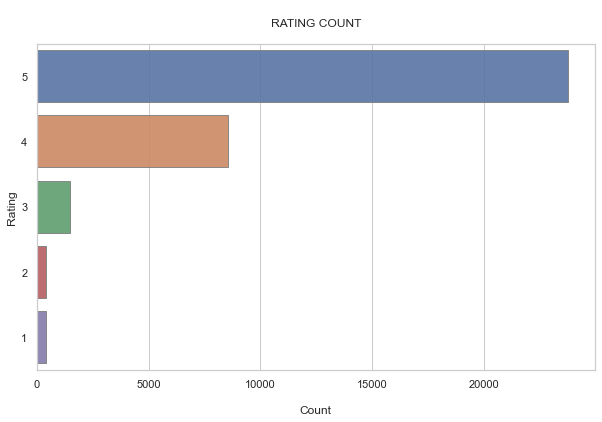

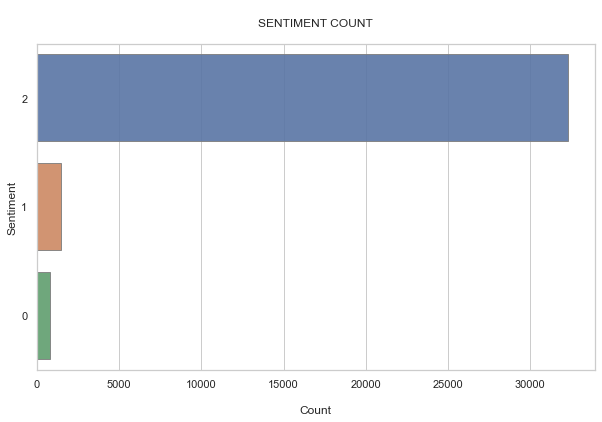

In [10]:
plot_count(df['rating'], [5,4,3,2,1], '\nRATING COUNT\n', 'Rating')
plot_count(df['cat_rating'], [2,1,0], '\nSENTIMENT COUNT\n', 'Sentiment')

## Data Preprocessing and Preparation

### Data Preprocessing

- Spelling Correction
- Punctuation removal
- Stop words removal
- Lemmatizing


In [11]:
from textblob import TextBlob

def get_wordnet_pos(word):
    '''
    Map POS tag to first character lemmatize() accepts
    '''
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)



def text_preprocess(doc):
    '''
    Preprocess the docs.
    
    - Spelling Correction
    - Punctuation removal
    - Stop words removal
    - Lemmatizing
    '''
    lemmatizer = WordNetLemmatizer()
    
    doc = str(doc)
    tb_doc = TextBlob(doc)
    tb_doc = tb_doc.correct()
    doc = tb_doc
    
    #Remove pontuation
    process_doc = [char for char in doc if char not in string.punctuation]
    process_doc = ''.join(process_doc)
    
    #Remove stopwords and lemmatize
    process_doc = [lemmatizer.lemmatize(word, get_wordnet_pos(word))
                   for word in process_doc.split() if word.lower() not in stopwords.words('english')]
    
    
    #Make string
    process_doc = ' '.join(process_doc)
    
    return process_doc

Before preprocessing the data, we combine the title column with the text one, as it contains valuable of key words and should help the model classifying the reviews.

In [12]:
#Combining columns
df['doc'] = df.title +' '+ df.text
df = df[['cat_rating', 'doc' ]]

#Make a list of docs
docs = df['doc']
docs = docs.tolist()

Preprocessing tha data.

In [13]:
#Get tokens from reviews
# tokens = [text_preprocess(doc) for doc in docs]

#Get tokens from csv (There's no need to run the code again)
df_read_tokens = pd.read_csv('tokens.csv')
tokens = df_read_tokens.tokens.tolist()




#Show first 5
print('tokens (first 3):\n')
for i in range(3):
    print(tokens[i])


tokens (first 3):

Kindle product far disappointed child love use like ability monitor control content see ease
fast great beginner experienced person Ought gift love
Beginner tablet 9 year old son Expensive tablet use learn step NABI thrill learn Type already


In [14]:
#Save tokens to csv file
# df_tokens = pd.DataFrame()
# df_tokens['tokens'] = tokens
# df_tokens.to_csv('tokens.csv')

### Most Frequent Words

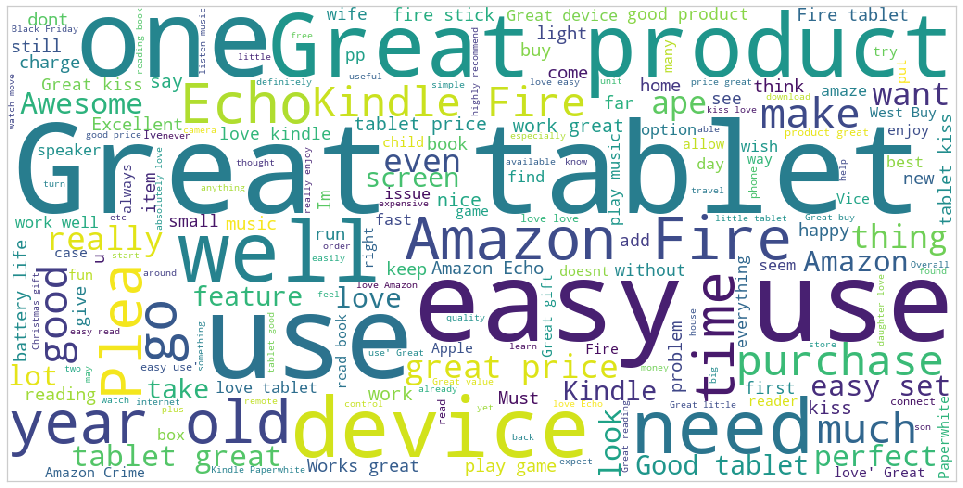

In [15]:
#Generate Word Cloud
wc_img = wc(width = 1024, height = 512, 
                background_color ='white', 
                min_font_size = 10).generate(str(tokens))


fig, ax = plt.subplots(figsize=(17, 12))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax.imshow(wc_img, interpolation='nearest')
plt.show()

### Data Preparation

 - Training / test sets set up
 - Data balancing (Undersampling)
 - Tokenization and vectorization

### Helper functions

In [16]:
#Helper functions

def balanced_split(tokens, ratings, test_size, include_neutral=False, SEED=SEED):
    '''
    Return X_train, X_test, y_train, y_test.
    
    The training set had its classes balanced, whereas the test set was kept with its original distribution.
    '''
    
    #Create the data frame
    df_balanced = pd.DataFrame()
    df_balanced['text'] = tokens
    df_balanced['cat_rating'] = ratings
     
    
    #Build test subset with imbalanced values (original state)
    df_balanced = df_balanced.sample(frac=1, random_state=SEED)
    classes_len = [int(x * test_size * len(df_balanced)) for x in df_balanced.cat_rating.value_counts(1).tolist()]
    
    
    df0_test = df_balanced[df_balanced['cat_rating']==0][:classes_len[2]]
    df1_test =df_balanced[df_balanced['cat_rating']==1][:classes_len[1]]
    df2_test =df_balanced[df_balanced['cat_rating']==2][:classes_len[0]]
    
    
    #Build a balanced training set
    df_balanced = df_balanced.sample(frac=1, random_state=SEED)
    length = len(df_balanced[df_balanced['cat_rating']==0])

    df0_train = df_balanced[df_balanced['cat_rating']==0]
    df1_train = df_balanced[df_balanced['cat_rating']==1][:length]
    df2_train = df_balanced[df_balanced['cat_rating']==2][:length]
    
    #Set up the arrays: X_train, X_test, y_train, y_test
    if include_neutral==True:
        X_train = np.concatenate((df0_train['text'].values, df1_train['text'].values,
                                  df2_train['text'].values),axis=0)
        
        y_train = np.concatenate((df0_train['cat_rating'].values,
                                  df1_train['cat_rating'].values, df2_train['cat_rating'].values),axis=0)
        
        X_test = np.concatenate((df0_test['text'].values, df1_test['text'].values,
                                 df2_test['text'].values),axis=0)
        
        y_test = np.concatenate((df0_test['cat_rating'].values, df1_test['cat_rating'].values,
                                 df2_test['cat_rating'].values),axis=0) 
    else:     
        X_train = np.concatenate((df0_train['text'].values, df2_train['text'].values),axis=0)
        
        y_train = np.concatenate((df0_train['cat_rating'].values, df2_train['cat_rating'].values),axis=0)
        
        X_test = np.concatenate((df0_test['text'].values, df2_test['text'].values),axis=0)
        
        y_test = np.concatenate((df0_test['cat_rating'].values, df2_test['cat_rating'].values),axis=0)   
      
    return X_train, X_test, y_train, y_test







def data_prep(func, tokens, ratings, ngram_range=(1,1), test_size=0.3, random_state=SEED, balanced=True, include_neutral=False):
    '''
    Split the data into trainig and test sets and vectorize it.
    If balanced = True, the data categories will be balanced for the training set.
    
    '''
    
    #Get training / test sets balanced or not
    if balanced == True:
        X_train, X_test, y_train, y_test = balanced_split(tokens, ratings,test_size, include_neutral=True)

    else:
        X_train, X_test, y_train, y_test = train_test_split(tokens, df.cat_rating.values,
                                                            test_size=test_size,
                                                            random_state=random_state)
    #Vectorize the tokens
    vectorizer = func(ngram_range=ngram_range)
    X_train_vector = vectorizer.fit_transform(X_train)
    X_test_vector = vectorizer.transform(X_test)
    
    return X_train_vector, X_test_vector, y_train, y_test, X_train, X_test, vectorizer






def evaluate_model(clf, X_test, y_test):
    ''' Plot Confusion Matrix and Classification Report'''
    
    if len(np.unique(y_test)) == 3:
        target_names = ['Angry', 'Neutral', 'Happy']
    else:
        target_names = ['Angry', 'Happy']
    
    
    plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels = target_names,
                                 cmap=plt.cm.Blues)
    plt.title('CONFUSION MATRIX\n')
    print(classification_report(y_test, clf.predict(X_test), target_names = target_names))
    plt.show()


    
    
    
    
def test_models(names, classifiers, X_train_vector, X_test_vector, y_test, verbose=2):
    '''
    Fit and evaluate a list of models without hyperparameters tunning.
    '''    
    scores = []    
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train_vector, y_train)
        score = clf.score(X_test_vector, y_test)
        scores.append(score)
        
        if verbose == 2:
            print('\n\n',name.upper(),'\n')
            evaluate_model(clf, X_test_vector, y_test)
        elif verbose == 1:
            print('\n',name.upper()," score: ",score)

    return scores




### Balanced vs Imbalanced Data

On the next lines, the SVM and Logistic Regression models will be fit to the data so we can understand how balanced vs imbalanced data behaves.

For the balanced run, the training set was randomly undersampled whereas the test set was kept with its original distribution.

According to Bart Baesens, author of Fraud Analytics: "...both oversampling and undersampling should be conducted on the training data and not on the test data.". 

Having that in mind, our validation sets, which will be part of the training set during cross validation, also should contain the original categories distribution. However, for sake of simplicity, it will not be considered.



--------------BALANCED DATA SET--------------



 SUPPORT VECTOR MACHINES 

              precision    recall  f1-score   support

       Angry       0.24      0.86      0.38       243
     Neutral       0.16      0.76      0.26       449
       Happy       0.99      0.75      0.86      9694

    accuracy                           0.76     10386
   macro avg       0.46      0.79      0.50     10386
weighted avg       0.94      0.76      0.82     10386



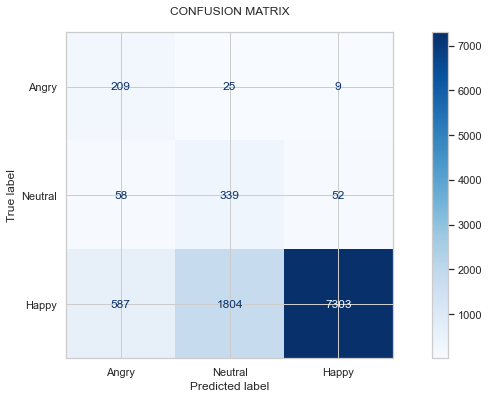



 LOGISTIC REGRESSION 

              precision    recall  f1-score   support

       Angry       0.25      0.86      0.38       243
     Neutral       0.16      0.72      0.26       449
       Happy       0.99      0.77      0.86      9694

    accuracy                           0.77     10386
   macro avg       0.47      0.78      0.50     10386
weighted avg       0.94      0.77      0.83     10386



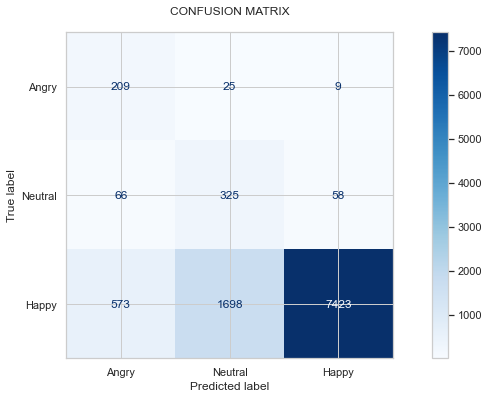



--------------IMBALANCED DATA SET--------------



 SUPPORT VECTOR MACHINES 

              precision    recall  f1-score   support

       Angry       0.63      0.21      0.32       247
     Neutral       0.64      0.04      0.07       477
       Happy       0.94      1.00      0.97      9664

    accuracy                           0.94     10388
   macro avg       0.74      0.42      0.45     10388
weighted avg       0.92      0.94      0.91     10388



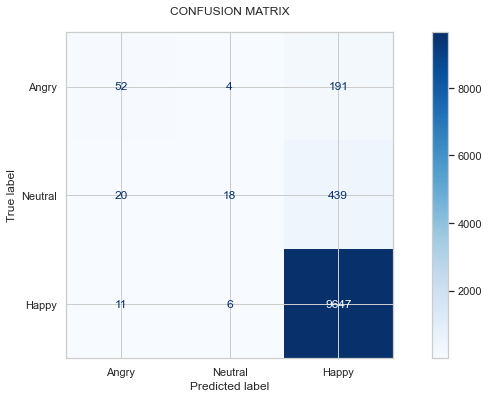



 LOGISTIC REGRESSION 

              precision    recall  f1-score   support

       Angry       0.69      0.15      0.25       247
     Neutral       0.60      0.09      0.16       477
       Happy       0.94      1.00      0.97      9664

    accuracy                           0.94     10388
   macro avg       0.74      0.41      0.46     10388
weighted avg       0.92      0.94      0.91     10388



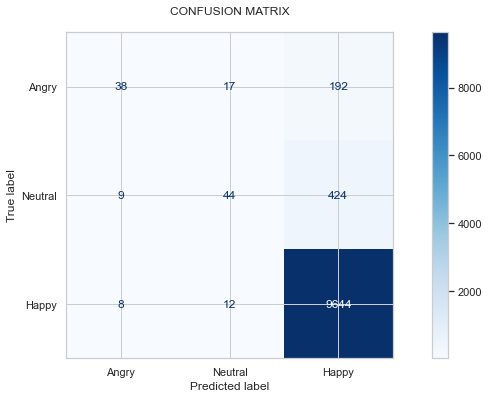

In [17]:
#Define test classifiers
names = ["Support Vector Machines", "Logistic Regression"]

classifiers = [
    SVC(kernel="linear"),
    LogisticRegression()]



#Test classifiers
balance_list = [True, False]

for balance in balance_list:
    if balance == True:
        print('\n\n--------------BALANCED DATA SET--------------\n')
    else:
        print('\n\n--------------IMBALANCED DATA SET--------------\n')
    X_train_vector, X_test_vector, y_train, y_test, X_train, X_test, vectorizer = data_prep(TfidfVectorizer,
                                                                                tokens, df.cat_rating.values,
                                                                                random_state=SEED,
                                                                                balanced=balance,
                                                                                include_neutral=True)
    test_models(names, classifiers, X_train_vector, X_test_vector, y_test)

<hr />
Both models had severe problems training on the imbalanced data set, presenting a large bias towards the predominant class. Even though their accuracy is higher, the models have a low predictive power. The training set contains 10,338 observations and 93% of it corresponds to 'Happy' reviews. Both models got 94% of accuracy. In other words, the models could be just classifying every document as 'Happy' and the result would be virtually the same. This is even clearer when we look at the precision and recall numbers for the classes "Angry" and "Neutral".

For our purpose, every class has equal importance, thus we will be working with the balanced data.


### Vectorizer - Which function performs better ( TfidfVectorizer   vs   CountVectorizer )

Here the same two models are fitted again so we can define the best vectorizer function.

In [18]:
#Define test classifiers
names = ["Support Vector Machines", "Logistic Regression"]

classifiers = [
    SVC(kernel="linear"),
    LogisticRegression()]



#Test classifiers
func_list = [TfidfVectorizer, CountVectorizer]

for func in func_list:
    if func == TfidfVectorizer:
        print('\n\n------------------TfidfVectorizer--------------\n')
    else:
        print('\n\n------------------CountVectorizer--------------\n')
    X_train_vector, X_test_vector, y_train, y_test, X_train, X_test,vectorizer = data_prep(func,
                                                                                tokens, df.cat_rating.values,
                                                                                random_state=SEED,
                                                                                balanced=True,
                                                                                ngram_range=(1,3),
                                                                                include_neutral=True)
    
    test_models(names, classifiers, X_train_vector, X_test_vector, y_test, verbose=1)



------------------TfidfVectorizer--------------


 SUPPORT VECTOR MACHINES  score:  0.7953013672251107

 LOGISTIC REGRESSION  score:  0.7869247063354515


------------------CountVectorizer--------------


 SUPPORT VECTOR MACHINES  score:  0.7661274792990564

 LOGISTIC REGRESSION  score:  0.7880801078374735


<br>
<br>
<hr />
Both SVM and the Logistic Regression models had a better performance using the TfidfVectorizer function.


The values for ngram_range were also tested and (1,3) produced better results.

### Data Preparation - Final State

In [19]:
X_train_vector, X_test_vector, y_train, y_test, X_train, X_test, vectorizer = data_prep(TfidfVectorizer,
                                                                                        tokens, df.cat_rating.values,
                                                                                        random_state=SEED,
                                                                                        balanced=True,
                                                                                        ngram_range=(1,3),
                                                                                        include_neutral=True)


#Present the shape and an exemple

print('X_train_vector.shape: ',X_train_vector.shape)
print('X_test_vector.shape: ',X_test_vector.shape)
print('\n')
print('Training vector: ',X_train_vector[0].toarray())
print('\nTraining text tokenized: ', X_train[0])
print('\nSentiment: ', y_train[0])

X_train_vector.shape:  (2436, 85437)
X_test_vector.shape:  (10386, 85437)


Training vector:  [[0. 0. 0. ... 0. 0. 0.]]

Training text tokenized:  purchase Fire box stop work one day Wont boot sits log spoke customer service could care less say best could sell another box see warranty expire like bought 2012 Someone even told ROKU box watch instead TOTALLY UNEXCEPTIONABLE wife long time Crime member expect little Amazon way buy Nvidia Shield stream need BTW Amazon pp wink first box ever own stop work

Sentiment:  0


In [20]:
#Create a dataframe with the TfidfVectorizer features and weights
df_vectorizer = pd.DataFrame()
df_vectorizer['words'] = list(vectorizer.vocabulary_.keys())
df_vectorizer['val'] = list(vectorizer.vocabulary_.values())
df_vectorizer.sort_values(by='val', inplace=True)

Here we see the weights adopted by the TfidfVectorizer for some of the features.

Text(0.5, 1.0, 'Tf–idf Term Weighting\n')

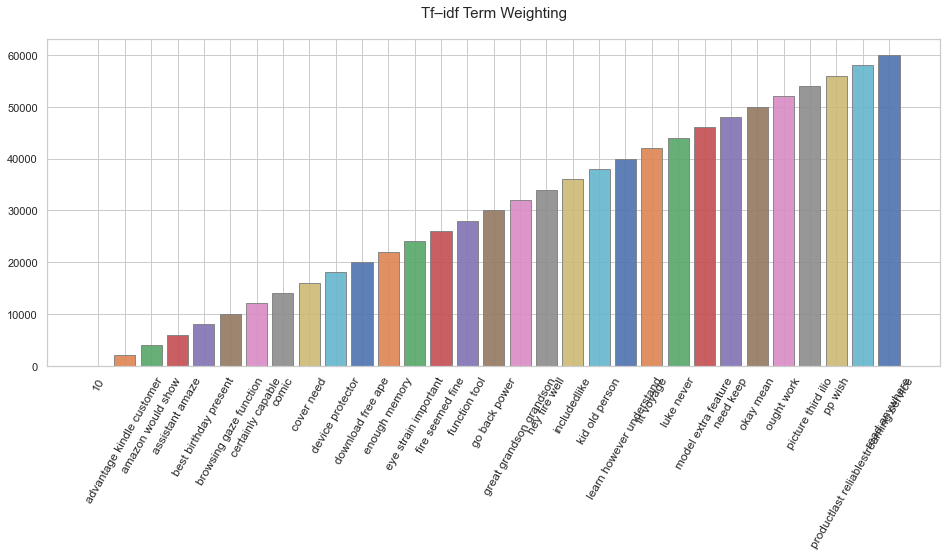

In [21]:
#Plot features weights
fig, ax = plt.subplots(figsize=(16,6))

for i in range(0,60414,2000):
    ax.bar(df_vectorizer.iloc[i]['words'], df_vectorizer.iloc[i]['val'], alpha = 0.9, edgecolor='gray')
    
ax.tick_params(axis="x", labelsize=12, labelrotation=60)
ax.set_title('Tf–idf Term Weighting\n', fontsize=15)

Text(0.5, 1.0, 'Test Set Distribution\n')

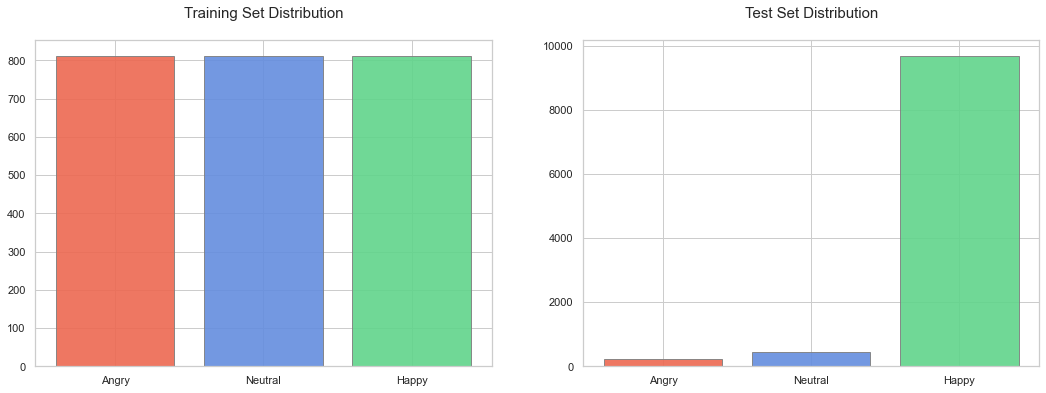

In [22]:
#Plot classes distribution for training and test sets
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,6))

label_list = ['Angry', 'Neutral', 'Happy']
colors_list = ['#ed6851', '#648dde', '#61d48b']
ax1.bar(label_list, np.unique(y_train, return_counts=True)[1], edgecolor='gray', color=colors_list, alpha=0.9)
ax2.bar(label_list, np.unique(y_test, return_counts=True)[1], edgecolor='gray', color=colors_list, alpha=0.9)

ax1.set_title('Training Set Distribution\n', fontsize=15)
ax2.set_title('Test Set Distribution\n', fontsize=15)



## Classification Models

Here we are going to train several classifiers to find out which ones perform better.

The best ones will be hyperparameter tuned.

### Base Models

In [23]:
#Define a name's list
names = ["Nearest Neighbors", "Support Vector Machines", "Gradient Boosting",
         "Decision Tree", "Random Forest", "AdaBoost", "Logistic Regression", "Naive Bayes"]

#Define a model's list
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=1),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    LogisticRegression(),
    MultinomialNB()]

In [25]:
scores = test_models(names, classifiers, X_train_vector, X_test_vector, y_test, verbose=1)


 NEAREST NEIGHBORS  score:  0.6813980358174465

 SUPPORT VECTOR MACHINES  score:  0.7953013672251107

 GRADIENT BOOSTING  score:  0.738205276333526

 DECISION TREE  score:  0.640477565954169

 RANDOM FOREST  score:  0.7840362025803966

 ADABOOST  score:  0.7374350086655113

 LOGISTIC REGRESSION  score:  0.7869247063354515

 NAIVE BAYES  score:  0.7755632582322357


<AxesSubplot:xlabel='score', ylabel='classifier'>

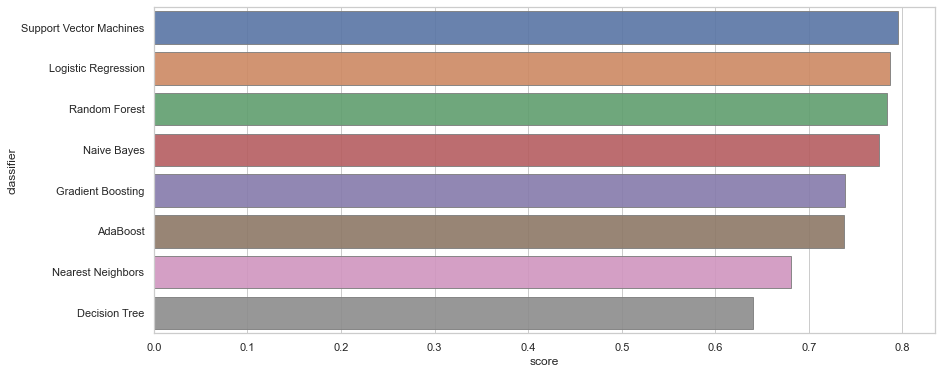

In [26]:
#Plot models scores
df_scores = pd.DataFrame()
df_scores['classifier'] = names
df_scores['score'] = scores
df_scores.sort_values(by='score', ignore_index=True, ascending=False, inplace=True)
df_scores.set_index('classifier', inplace=True)
sns.barplot(y=df_scores.index, x="score", data=df_scores, edgecolor='gray', alpha=0.9)

### Grid Search and Cross Validation


Fine tuning the models.

In [27]:
#Helper function

def results_GSCV(model_GSCV, X_test_vector, y_test, model_name = None):
    '''
    Display results from Grid Search.
    
    '''
    
    clear_output()
    
    new_score = model_GSCV.score(X_test_vector, y_test)
    
    if model_name != None:
    
        print('Best score (training data): ', model_GSCV.best_score_)
        print('Best parameters: ', model_GSCV.best_params_)
        print('\nTest score: ', new_score)
        
        #Calculate improvement
        original_score = df_scores.loc[model_name].values
        improvement = 100*(new_score - original_score)/ original_score
        
        print('Original score: ', original_score[0])
        
        print('\nTuning impovement: ', improvement[0],"%")
        print('\n')
    
    else:
        print('Score: ', model_GSCV.score(X_test_vector, y_test))
    
    evaluate_model(model_GSCV, X_test_vector, y_test)

#### Support Vector Machines

Best score (training data):  0.6867766856296496
Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Test score:  0.7996341228576931
Original score:  0.7953013672251107

Tuning impovement:  0.5447941888619948 %


              precision    recall  f1-score   support

       Angry       0.35      1.00      0.51       243
     Neutral       0.19      0.84      0.31       449
       Happy       1.00      0.79      0.88      9694

    accuracy                           0.80     10386
   macro avg       0.51      0.88      0.57     10386
weighted avg       0.95      0.80      0.85     10386



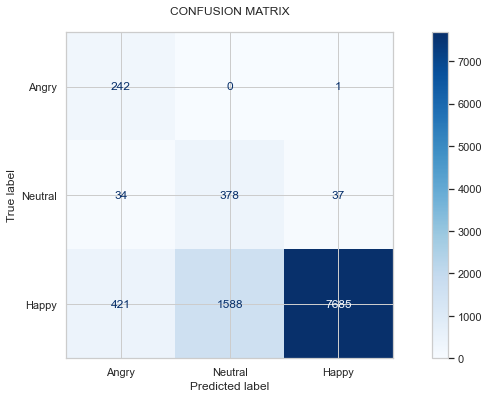

In [33]:
#Define model
svm = SVC(probability = True)

#Define parameters to grid search
params = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
           'C': [.1, 1, 10, 100, 1000]},
                                 
          {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]}]
                                 
#           {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]



#Grid search
svm_GSCV = GridSearchCV(svm, params, cv=5, verbose=2).fit(X_train_vector, y_train)


#Display results
results_GSCV(svm_GSCV, X_test_vector, y_test, "Support Vector Machines")

#### Logistic Regression

Best score (training data):  0.6867741609721615
Best parameters:  {'C': 1.5, 'penalty': 'l2'}

Test score:  0.7912574619680339
Original score:  0.7869247063354515

Tuning impovement:  0.5505934173498198 %


              precision    recall  f1-score   support

       Angry       0.31      0.99      0.47       243
     Neutral       0.19      0.81      0.31       449
       Happy       0.99      0.79      0.88      9694

    accuracy                           0.79     10386
   macro avg       0.50      0.86      0.55     10386
weighted avg       0.94      0.79      0.84     10386



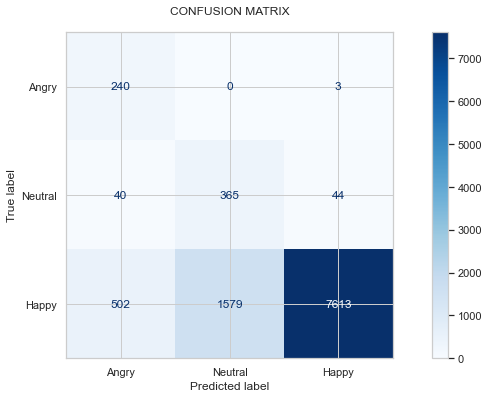

In [34]:
#Define model
log_reg = LogisticRegression()

#Define parameters to grid search
params={'C': np.linspace(0,1.5,20),
       'penalty' : ['l1', 'l2']}

#Grid search
log_reg_GSCV = GridSearchCV(log_reg, params, cv=5, verbose=2).fit(X_train_vector, y_train)


#Display results
results_GSCV(log_reg_GSCV, X_test_vector, y_test, 'Logistic Regression') 

#### Naive Bayes

Best score (training data):  0.6912924563234255
Best parameters:  {'alpha': 0.631578947368421}

Test score:  0.7740227228962064
Original score:  0.7755632582322357

Tuning impovement:  -0.19863438857852256 %


              precision    recall  f1-score   support

       Angry       0.29      0.99      0.45       243
     Neutral       0.18      0.82      0.29       449
       Happy       0.99      0.77      0.87      9694

    accuracy                           0.77     10386
   macro avg       0.49      0.86      0.53     10386
weighted avg       0.94      0.77      0.83     10386



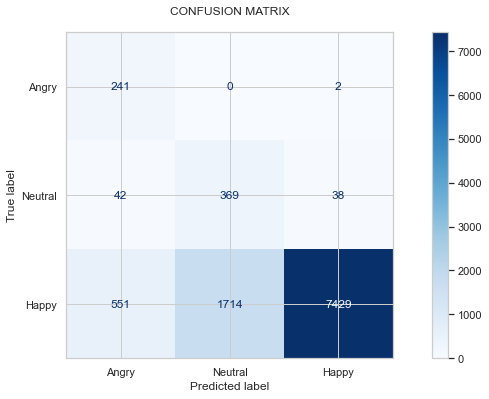

In [35]:
#Define model
naive_bayes = MultinomialNB()

#Define parameters to grid search
params={'alpha': np.linspace(0,1.5,20)}

#Grid search
naive_bayes_GSCV = GridSearchCV(naive_bayes, params, cv=5, verbose=2).fit(X_train_vector, y_train)

#Display results
results_GSCV(naive_bayes_GSCV, X_test_vector, y_test, 'Naive Bayes') 

#### Random Forest

Best score (training data):  0.6633773184771267
Best parameters:  {'criterion': 'entropy', 'max_depth': 75, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 230}

Test score:  0.8355478528788755
Original score:  0.7840362025803966

Tuning impovement:  6.570060174382918 %


              precision    recall  f1-score   support

       Angry       0.26      0.86      0.40       243
     Neutral       0.21      0.58      0.31       449
       Happy       0.99      0.85      0.91      9694

    accuracy                           0.84     10386
   macro avg       0.48      0.76      0.54     10386
weighted avg       0.94      0.84      0.87     10386



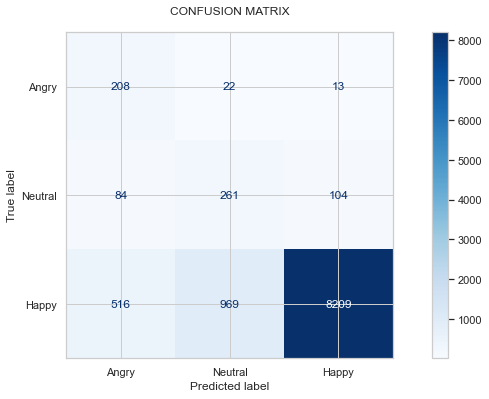

In [36]:
#Define model
rand_forest = RandomForestClassifier(random_state=SEED)

#Define parameters to grid search
params={'min_samples_split': [2,3],
        'min_samples_leaf' : [4],
        'max_depth' : [3,5,10,20,50,75,100,None],
        'criterion' : ['gini', 'entropy'],
        'n_estimators' : np.arange(150,250,20)
       }

#Grid search
rand_forest_GSCV = GridSearchCV(rand_forest, params, cv=5, verbose=2).fit(X_train_vector, y_train)

#Display results
results_GSCV(rand_forest_GSCV, X_test_vector, y_test, "Random Forest") 

#### Gradient Boosting

Best score (training data):  0.630952380952381
Best parameters:  {'subsample': 0.30000000000000004, 'n_estimators': 170, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20, 'learning_rate': 0.1, 'criterion': 'mse', 'ccp_alpha': 0.0}

Test score:  0.7745041401887156
Original score:  0.738205276333526

Tuning impovement:  4.917177514021126 %


              precision    recall  f1-score   support

       Angry       0.21      0.81      0.33       243
     Neutral       0.16      0.65      0.26       449
       Happy       0.99      0.78      0.87      9694

    accuracy                           0.77     10386
   macro avg       0.45      0.75      0.49     10386
weighted avg       0.93      0.77      0.83     10386



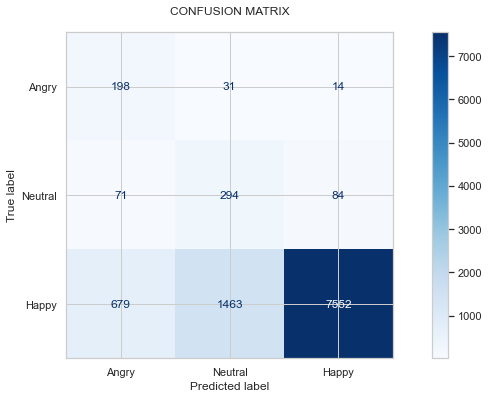

In [37]:
#Define model
gboost = GradientBoostingClassifier(random_state=SEED)

#Define parameters to random search
params={'learning_rate' : [0.01,0.1,1],
        'n_estimators' : np.arange(140,200,30),
        'subsample' : np.arange(0.1,1,0.2),
        'criterion' : ['mse'],
        'min_samples_split' : np.arange(3,5,1),
        'min_samples_leaf' : np.arange(4,6,1),
        'max_depth' : [3,5,10,20,50,75,100,None],
        'max_features' : ['auto', 'sqrt', 'log2'],
        'ccp_alpha' : np.arange(0,3,0.5)}

#Random search
gboost_GSCV = RandomizedSearchCV(gboost, params, cv=3, verbose=2, n_iter=50).fit(X_train_vector, y_train)

#Display results
results_GSCV(gboost_GSCV, X_test_vector, y_test, "Gradient Boosting") 

### Voting Classifier

Score:  0.8000192566917004
              precision    recall  f1-score   support

       Angry       0.35      1.00      0.51       243
     Neutral       0.19      0.83      0.31       449
       Happy       0.99      0.79      0.88      9694

    accuracy                           0.80     10386
   macro avg       0.51      0.87      0.57     10386
weighted avg       0.94      0.80      0.85     10386



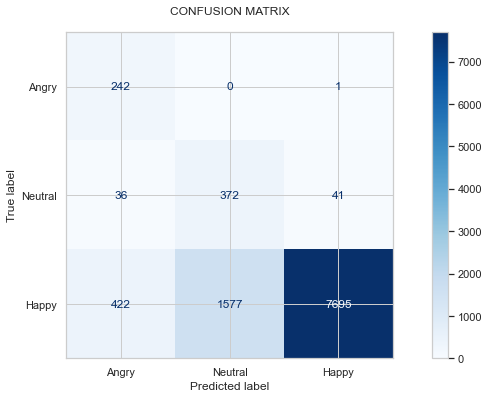

Best parameters:  {'weights': (1, 0, 0, 2, 0)}


In [38]:
import itertools
import random

#List os voters
voters = [("Support Vector Machines", svm_GSCV.best_estimator_),
          ('Logistic Regression', log_reg_GSCV.best_estimator_),
          ("Gradient Boosting", gboost_GSCV.best_estimator_),     
          ('Naive Bayes', naive_bayes_GSCV.best_estimator_),
          ("Random Forest",rand_forest_GSCV.best_estimator_)]


#Models weights to grid search
# random.sample(weights_list, len(weights_list)
weights_list = list(itertools.product((2,1,0), repeat=len(voters)))

#Define model
vote_clf = VotingClassifier(estimators= voters,voting='soft')

#Define parameters
params = {'weights' : weights_list}

#Grid search
vote_clf_GSCV = GridSearchCV(vote_clf, params, cv=5, verbose=2).fit(X_train_vector, y_train)

#Display results


results_GSCV(vote_clf_GSCV, X_test_vector, y_test) 

print('Best parameters: ',vote_clf_GSCV.best_params_)

## Wrapping up

Several classifiers were built and the best ones were fine tuned through grid search and cross validation. After that, they were used as part of the Ensemble Voting Classifier. This approach resulted a model performance quite similar to the SVM model. In fact, after grid search the voting classifier considering different weights for each model, the best configuration found was SVM-weight = 1 and Random Forest-weight = 2.

Overall, we were able to achieve 80% of accuracy and 57% for the f1-macro metric, which takes into account precision and recall for all classes. The scores are not marvelous, but taking into account that we are working with three classes and do not have a huge amount of data available, it is reasonable. 

There is still room for improvement though. The classes imbalance could have been handled in a different way, adopting different weights for each class or oversampling rather than under sampling. Another way would be investing more time thoroughly preprocessing the data and testing hyperparameters.

Finally, more powerful models can be applied, such as LSTM Neural Networks or BERT (Bidirectional Encoder Representations from Transformers). That will be the second part of this study, fine tuning the BERT model to this data set and see how much it will be able to improve the classification metrics.

Below, in order to better visualize how the data was interpreted by the models, it was plotted some of the Logistic Regression coefficients (log odds) and their respective features. Positive coefficients correspond to an outcome True for the class and negative the opposite. The gray bars represent the TfidfVectorizer weights, so it is easy to compare the input and the output. The TfidfVectorizer weights are rescaled to fit the graph and for the negative coefficients, they were turned negative as well.




In [39]:
df_vectorizer['words'] = list(vectorizer.vocabulary_.keys())
df_vectorizer['val'] = list(vectorizer.vocabulary_.values())
df_vectorizer['log_reg_angry'] = log_reg_GSCV.best_estimator_.coef_[0,:]
df_vectorizer['log_reg_neutral'] = log_reg_GSCV.best_estimator_.coef_[1,:]
df_vectorizer['log_reg_happy'] = log_reg_GSCV.best_estimator_.coef_[2,:]

df_vectorizer['log_reg_happy'] = log_reg_GSCV.best_estimator_.coef_[2,:]

In [40]:
from matplotlib.patches import Patch

def plot_main_features(df, column_name, title):
    '''
    Plot main features of Logistic Regression and TfidfVectorizer input feture's weights.
    '''
    
    alpha_coef = 0.55
    alpha_weight = 0.6
    
    df.sort_values(by=column_name, inplace=True)
    
    fig, ax = plt.subplots(figsize=(20,8))
    
    normalize = df[column_name].max()/df['val'].max()
    
    for i in range(0,25,1):
        ax.bar(df.iloc[i]['words'], -df.iloc[i]['val']*normalize, color='#a6a6a6', alpha=alpha_weight)
        ax.bar(df.iloc[i]['words'], df.iloc[i][column_name], color='#ff462e', alpha=alpha_coef)

    for i in range(25,0,-1):
        ax.bar(df.iloc[-i]['words'], df.iloc[-i]['val']*normalize, color='#a6a6a6', alpha=alpha_weight)
        ax.bar(df.iloc[-i]['words'], df.iloc[-i][column_name], color='#4287f5', alpha=alpha_coef)
    
    custom_lines = [Patch([0], [0], color='#ff462e', alpha=alpha_coef, label = "Negative class coefficients "),
                    Patch([0], [0], color='#4287f5', alpha=alpha_coef, label = "Positive class coefficients"),
                    Patch([0], [0], color='#a6a6a6', alpha=alpha_weight, label = "TfidfVectorizer weights (rescaled/non negative)")]
    
    ax.legend(handles= custom_lines, fontsize=14)
    ax.tick_params(axis="x", labelsize=13, labelrotation=80)
    ax.tick_params(axis="y", labelsize=12)
    ax.set_title(title, fontsize=16)
    
    
def get_sentiment(doc, model=vote_clf_GSCV, vectorizer=vectorizer):
    
    '''Classify a document.'''
    
    cls = model.predict(vectorizer.transform([text_preprocess(doc)]))
    
    if cls == 0:
        cls = 'ANGRY'
    
    elif cls == 1:
        cls = 'NEUTRAL'
    
    elif cls == 2:
        cls = 'HAPPY'
    print()    
    print(doc,':  ',cls) 

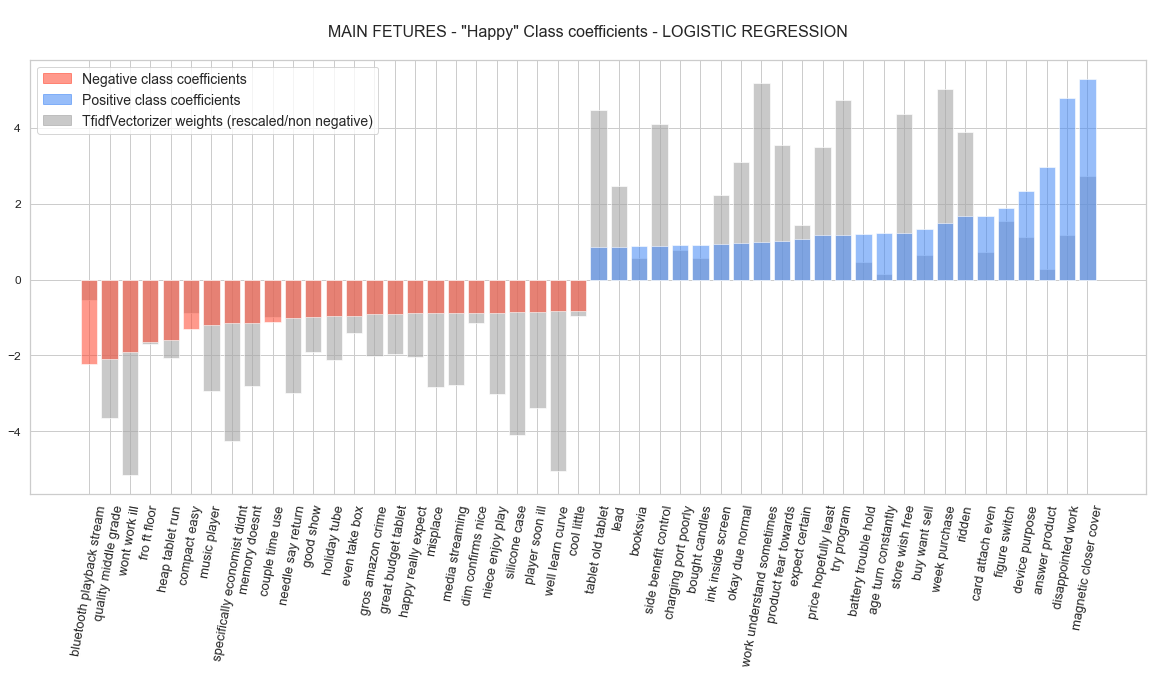

In [41]:
column_name = 'log_reg_happy'
title = '\nMAIN FETURES - "Happy" Class coefficients - LOGISTIC REGRESSION\n'
plot_main_features(df_vectorizer, column_name, title)

In [ ]:
column_name = 'log_reg_neutral'
title = '\nMAIN FETURES - "Neutral" Class coefficients - LOGISTIC REGRESSION\n'
plot_main_features(df_vectorizer, column_name, title)

In [ ]:
column_name = 'log_reg_angry'
title = '\nMAIN FETURES - "Angry" Class coefficients - LOGISTIC REGRESSION\n'
plot_main_features(df_vectorizer, column_name, title)

### And a few toy tests...

In [ ]:
get_sentiment('I love that product')
get_sentiment('The price was ok')
get_sentiment('The battery does not work')